In [3]:
rd = '/media/charles/1TB/Users/Charles Olivier/Downloads/ACHRI Models/vgg_face_caffe/'

In [4]:
ls -l "$rd"

total 566537
-rwxrwxrwx 1 charles charles     59680 Oct 13  2015 ak.png*
-rwxrwxrwx 1 charles charles      1126 Oct 13  2015 COPYING*
-rwxrwxrwx 1 charles charles       630 Oct 13  2015 matcaffe_demo.m*
-rwxrwxrwx 1 charles charles     36901 Oct 13  2015 names.txt*
-rwxrwxrwx 1 charles charles      1333 Oct 13  2015 README*
-rwxrwxrwx 1 charles charles 580013788 Oct 13  2015 VGG_FACE.caffemodel*
-rwxrwxrwx 1 charles charles      4773 Oct 13  2015 VGG_FACE_deploy.prototxt*


In [5]:
from skimage import transform
model = rd+'VGG_FACE_deploy.prototxt'
weights = rd+'VGG_FACE.caffemodel'

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# change this to your install dir
caffe_root = '~/Downloads/caffe-master/' 
import sys
sys.path.insert(0, caffe_root + 'python')
import caffe

plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [7]:
mean = np.array([129.1863,104.7624,93.5940])

In [12]:
tp='/home/charles/Documents/UCL/ACHRI/models/test-pics/'

In [13]:
ls $tp

charles-hs2.jpeg  just-russ2.jpg  russ-with-friends-in-park.jpg  winkleman.jpg
jai2.jpg          pai.jpg         sad-face-paint.jpg


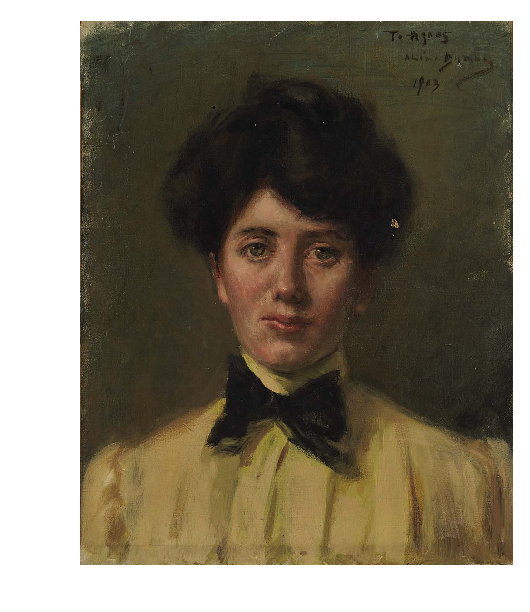

In [15]:
example_image = tp+'sad-face-paint.jpg'
#example_image = rd+'ak.png'
img = caffe.io.load_image(example_image)
plt.imshow(img);
plt.axis('off');

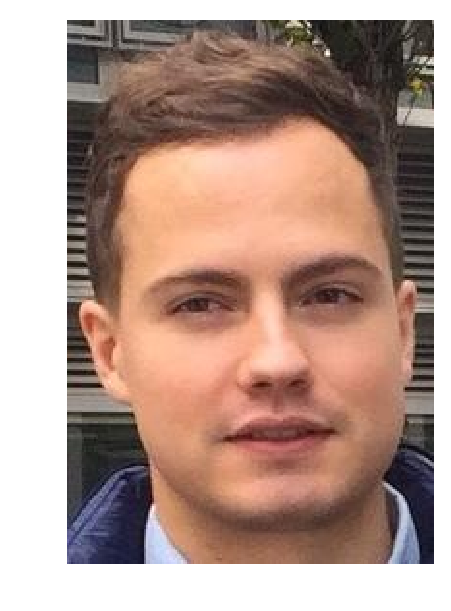

In [30]:
example_image = tp+'charles-hs2.jpeg'
#example_image = rd+'ak.png'
img = caffe.io.load_image(example_image)
plt.imshow(img);
plt.axis('off');

In [31]:
# resize, substract mean and permute channels
imgP = transform.resize(img, (224, 224, 3))
imgP=imgP[:,:,::-1]*255.0-mean
imgP = imgP.transpose((2,0,1))
imgP = imgP[None,:]

In [32]:
!echo $model

/media/charles/1TB/Users/Charles Olivier/Downloads/ACHRI Models/vgg_face_caffe/VGG_FACE_deploy.prototxt


In [33]:
net = caffe.Net(model, weights, caffe.TEST);

In [34]:
net.params

OrderedDict([('conv1_1', <caffe._caffe.BlobVec at 0x7ff9529d4e90>),
             ('conv1_2', <caffe._caffe.BlobVec at 0x7ff9529d4c60>),
             ('conv2_1', <caffe._caffe.BlobVec at 0x7ff952a68ee0>),
             ('conv2_2', <caffe._caffe.BlobVec at 0x7ff952a68b20>),
             ('conv3_1', <caffe._caffe.BlobVec at 0x7ff952a683a0>),
             ('conv3_2', <caffe._caffe.BlobVec at 0x7ff94cc99440>),
             ('conv3_3', <caffe._caffe.BlobVec at 0x7ff9529f3210>),
             ('conv4_1', <caffe._caffe.BlobVec at 0x7ff9529f3530>),
             ('conv4_2', <caffe._caffe.BlobVec at 0x7ff9529f3da0>),
             ('conv4_3', <caffe._caffe.BlobVec at 0x7ff9529f31c0>),
             ('conv5_1', <caffe._caffe.BlobVec at 0x7ff9529f33a0>),
             ('conv5_2', <caffe._caffe.BlobVec at 0x7ff9529c9d50>),
             ('conv5_3', <caffe._caffe.BlobVec at 0x7ff9529c9760>),
             ('fc6', <caffe._caffe.BlobVec at 0x7ff9529c9a80>),
             ('fc7', <caffe._caffe.BlobVec at 0x7ff9

1 x 4096


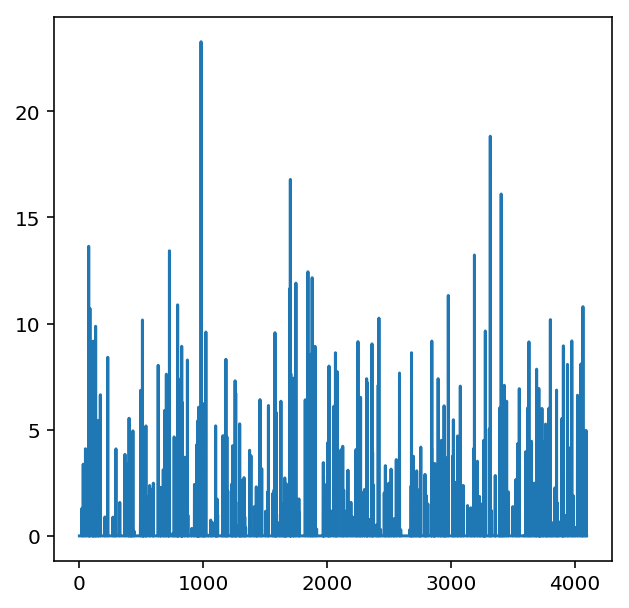

In [42]:
# forward test image and get data
res = net.forward_all(data=imgP)
caffe_ft = net.blobs['fc7']
print(caffe_ft.shape[0],'x', caffe_ft.shape[1])
plt.plot(caffe_ft.data[0])

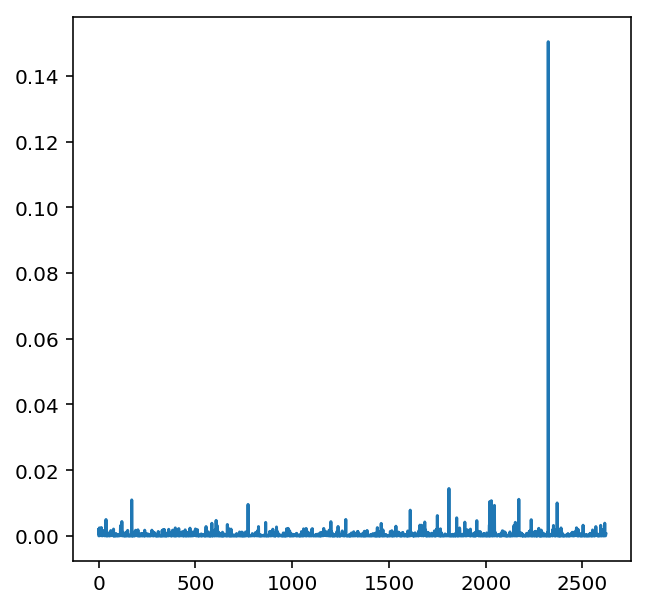

In [36]:
plt.plot(res['prob'][0]); # identity of image from training dataset

In [37]:
import csv
categories = []
with open(rd+'names.txt', 'rt') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        categories.append(str(row)[2:-2])

In [38]:
len(categories)

2622

In [39]:
categories[np.argmax(res['prob'][0])]

'Sophie_Winkleman'

A striking resemblance...


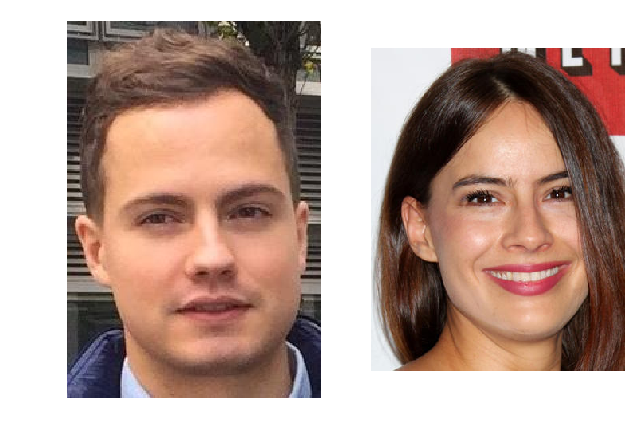

In [22]:
plt.figure(figsize=(5,10))
winke = caffe.io.load_image(tp+'winkleman.jpg');
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(winke)
plt.axis('off');
print('A striking resemblance...')

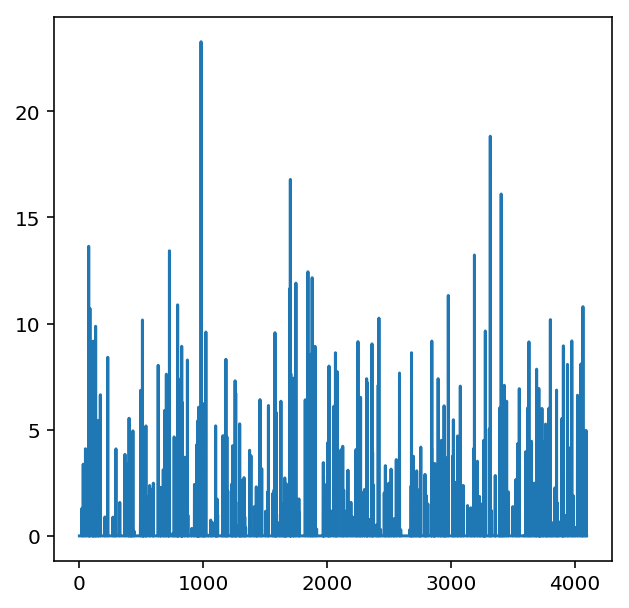

In [23]:
plt.plot(caffe_ft.data[0])
#plt.title('4096 extracted deep features');